In [14]:
import pandas as pd

ita_08 = pd.read_csv("C:\\Users\\stefa\\Desktop\\dsLab\\progetto_finale\\berakbyHour\\scandinavia20sera.csv")
ita_08

,Unnamed: 0,TSTOT.PrezzoScandi,TSTOT.ConsumiScandi,TSTOT.GradiScandi,TSTOT.ConsumipercScandi,TSTOT.PrezzopercScandi,TSTOT.BankHolidayScandi,TSTOT.EndYearScandi,TSTOT.DayOfWeekScandi,TSTOT.DayOffScandi,lunedi,martedi,mercoledi,giovedi,venerdi,sabato,domenica
0,0,34.95,38729.8,2.0,-1.747897,-1.991026,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,34.95,42813.8,4.0,-2.335438,-1.991026,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,33.06,42409.1,4.0,-2.350679,-1.607143,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,33.30,43227.3,3.0,-2.199572,-1.391768,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,34.00,44093.8,-1.0,-2.764651,-3.354179,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,14.43,45857.2,-2.0,2.748569,6.888889,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1456,1456,16.08,47810.0,1.0,2.456952,6.914894,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,1457,26.43,55252.8,-6.0,1.417199,9.804736,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1458,1458,17.31,53663.9,-1.0,1.367589,1.168907,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [15]:
ita_08 = ita_08.drop(ita_08.columns[[0]], axis=1)
del ita_08["TSTOT.ConsumipercScandi"]
del ita_08["TSTOT.PrezzopercScandi"]
del ita_08["TSTOT.DayOfWeekScandi"]
ita_08.columns = ["Prezzo","Consumo","Gradi","BankH","EndYear","DayOff","lunedi","martedi","mercoledi","giovedi","venerdi","sabato","domenica"]
ita_08.Gradi = ita_08.Gradi.shift(1)
ita_08.Prezzo = ita_08.Prezzo.shift(1)
ita_08["Giorno"] = ["lun" if lu==1 else "mar" if ma==1 else "mer" if me==1 else "gio" if gi==1 else "ven" if ve==1 else "sab" if sa==1 else "dom" for lu,ma,me,gi,ve,sa,do in zip(ita_08["lunedi"],ita_08["martedi"],ita_08["mercoledi"],ita_08["giovedi"],ita_08["venerdi"],ita_08["sabato"],ita_08["domenica"])]

del ita_08["lunedi"]
del ita_08["martedi"]
del ita_08["mercoledi"]
del ita_08["giovedi"]
del ita_08["venerdi"]
del ita_08["sabato"]
del ita_08["domenica"]
ita_08 = ita_08.dropna()

In [16]:
ita_08

,Prezzo,Consumo,Gradi,BankH,EndYear,DayOff,Giorno
1,34.95,42813.8,2.0,0.0,1.0,0.0,lun
2,34.95,42409.1,4.0,0.0,1.0,0.0,mar
3,33.06,43227.3,4.0,0.0,1.0,0.0,mer
4,33.30,44093.8,3.0,0.0,1.0,0.0,gio
5,34.00,44582.5,-1.0,1.0,0.0,0.0,ven
...,...,...,...,...,...,...,...
1455,12.26,45857.2,6.0,0.0,0.0,0.0,dom
1456,14.43,47810.0,-2.0,0.0,0.0,0.0,lun
1457,16.08,55252.8,1.0,0.0,1.0,0.0,mar
1458,26.43,53663.9,-6.0,0.0,1.0,0.0,mer


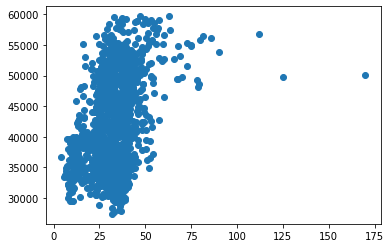

In [17]:
import matplotlib.pyplot as plt

plt.scatter(ita_08["Prezzo"], ita_08["Consumo"])
plt.show()

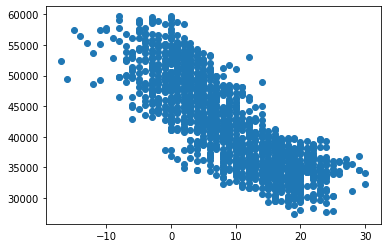

In [18]:
plt.scatter(ita_08["Gradi"], ita_08["Consumo"])
plt.show()

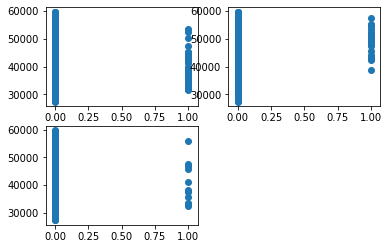

In [19]:
plt.subplot(221)
plt.scatter(ita_08["BankH"], ita_08["Consumo"])
plt.subplot(222)
plt.scatter(ita_08["EndYear"], ita_08["Consumo"])
plt.subplot(223)
plt.scatter(ita_08["DayOff"], ita_08["Consumo"])

plt.show()

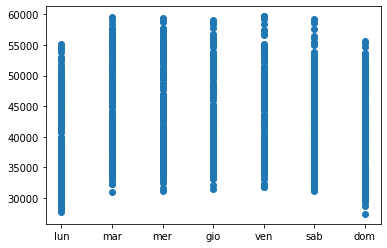

In [20]:
plt.scatter(ita_08["Giorno"], ita_08["Consumo"])
plt.show()

In [21]:
#ita_08["Gradi2"] = ita_08["Gradi"]**2

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

def preprocess_scale(X, scaler=None):
    if not scaler:  
        scaler = StandardScaler()
        scaler.fit(X)
    X = scaler.transform(X)
    return X, scaler

def preprocess_OneHot(X,encoder=None):
    if not encoder:
        encoder = OneHotEncoder(handle_unknown='ignore')
        encoder.fit(X)
    X = encoder.transform(X).toarray()
    return X, encoder

def preprocessing(X, OH_encoder=None, scaler=None):
    X_categorical = X["Giorno"].to_numpy().reshape(-1, 1)
    X_numeric = X[["Prezzo","Gradi","BankH","EndYear","DayOff"]] 
    X_categorical, OH_encoder = preprocess_OneHot(X_categorical, OH_encoder)
    X_numeric, scaler = preprocess_scale(X_numeric, scaler)
    
    dim_X_cat = X_categorical.shape[1]
    dim_X_num = X_numeric.shape[1]
    X = np.ndarray(shape=(X.shape[0],dim_X_cat+dim_X_num))

    X[:,0:dim_X_num] = X_numeric
    X[:,dim_X_num:dim_X_num+dim_X_cat] = X_categorical
    return X, OH_encoder, scaler

def metrics(X_test,y_test,regressor):
    #R2
    R2 = regressor.score(X=X_test,y=y_test.ravel())
    y_pred = regressor.predict(X_test)
    #RMSE
    RMSE = mean_squared_error(y_test, y_pred,squared=False)
    #MAE
    MAE = mean_absolute_error(y_test, y_pred)
    return R2,RMSE,MAE

def print_result(R2,RMSE,MAE,reg):
    print("R2 = %.2f" % R2)
    print("RMSE = %.2f" % RMSE)
    print("MAE = %.2f" % MAE)
    if hasattr(reg, 'coef_'):
        print()
        print("Coeff:")
        print(reg.coef_)
    if hasattr(reg, 'intercept_'):
        print()
        print("Intercept:")
        print(reg.intercept_)

def plot_result(X_train,X_test,y_train,y_test,regressor,scaler,onlyTest = False):
    
    y_test_p = regressor.predict(X_test)
    y_test = scaler.inverse_transform(y_test)
    y_test_p = scaler.inverse_transform(y_test_p)
    
    if not(onlyTest):
        y_train_p = regressor.predict(X_train)    
        y_train = scaler.inverse_transform(y_train)
        y_train_p = scaler.inverse_transform(y_train_p)
        forcast = np.concatenate((y_train_p,y_test_p))
        real = np.concatenate((y_train,y_test))
    else:
        forcast = y_test_p
        real = y_test
        
    plt.rcParams["figure.figsize"] = (20,3)
    plt.plot(real, color = 'blue', label = 'Real Test Set')
    plt.plot(forcast, linewidth=1,color = 'red', label = 'Predicted Test Set')
    plt.title('Consumi Energetici')
    plt.xlabel('Time')
    plt.ylabel('Consumo')
    plt.legend()
    plt.show()
    

In [23]:
X_train, X_test, y_train, y_test = train_test_split(ita_08[["Prezzo","Gradi","BankH","EndYear","DayOff","Giorno"]], ita_08["Consumo"], test_size=0.2, random_state=42)

In [24]:
X_train, OH_encoder, scaler = preprocessing(X_train)
y_train, scaler_y = preprocess_scale(y_train.to_numpy().reshape(-1, 1))

X_test,_,_ = preprocessing(X_test,OH_encoder,scaler)
y_test,_ = preprocess_scale(y_test.to_numpy().reshape(-1, 1), scaler_y)

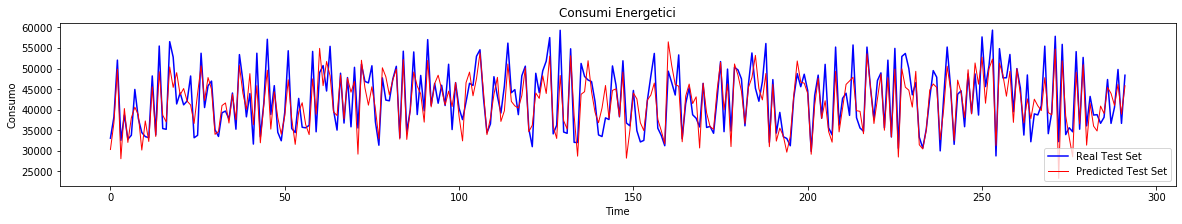

R2 = 0.73
RMSE = 0.54
MAE = 0.43

Coeff:
[-0.07976245 -0.85751196 -0.1260038  -0.00571084 -0.04177654 -0.38812032
  0.21551895 -0.47110142  0.20697575  0.15408959  0.0569898   0.22564765]

Intercept:
0.005392131543658259


In [27]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train.ravel())
R2,RMSE,MAE = metrics(X_test,y_test,reg)

plot_result(X_train,X_test,y_train,y_test,reg,scaler_y,True)
print_result(R2,RMSE,MAE,reg)

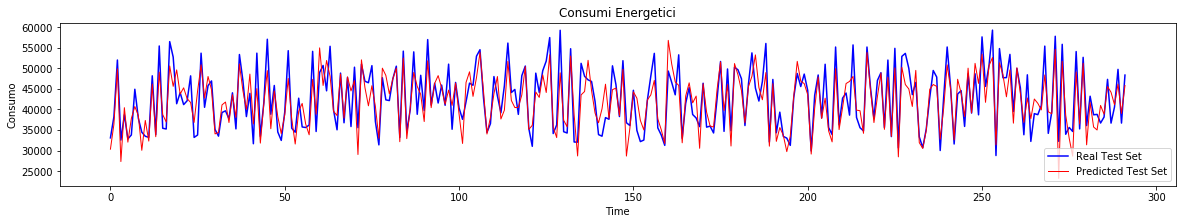

R2 = 0.73
RMSE = 0.54
MAE = 0.43

Coeff:
[[-0.08250087 -0.86758815 -0.14031183 -0.00505335 -0.05696587 -0.3961161
   0.2157087  -0.47175856  0.18648013  0.10848304  0.11595602  0.24124677]]

Intercept:
[0.01955423]


In [28]:
from sklearn.svm import SVR
#Kernel Lineare
reg = SVR(kernel='linear')
reg.fit(X_train,y_train.ravel())
R2,RMSE,MAE = metrics(X_test,y_test,reg)

plot_result(X_train,X_test,y_train,y_test,reg,scaler_y,True)
print_result(R2,RMSE,MAE,reg)

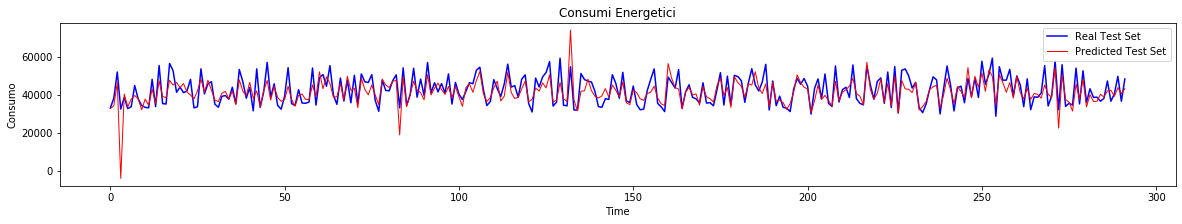

R2 = 0.55
RMSE = 0.70
MAE = 0.52

Intercept:
[-0.09081178]


In [29]:
#Kernel Polinomiale
reg = SVR(kernel='poly')
reg.fit(X_train,y_train.ravel())
R2,RMSE,MAE = metrics(X_test,y_test,reg)

plot_result(X_train,X_test,y_train,y_test,reg,scaler_y,True)
print_result(R2,RMSE,MAE,reg)

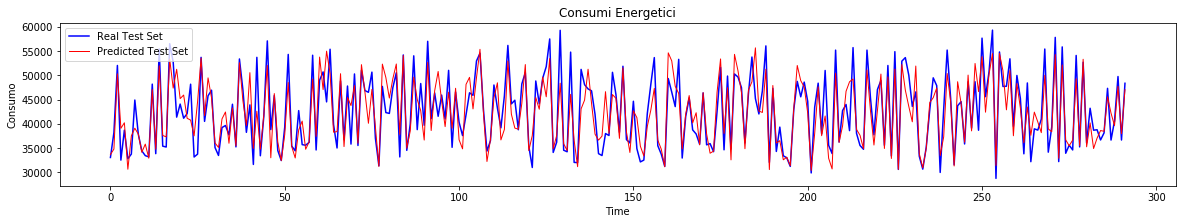

R2 = 0.76
RMSE = 0.51
MAE = 0.39

Intercept:
[0.39457341]


In [30]:
#Kernel Gaussiano
reg = SVR(kernel='rbf')
reg.fit(X_train,y_train.ravel())
R2,RMSE,MAE = metrics(X_test,y_test,reg)

plot_result(X_train,X_test,y_train,y_test,reg,scaler_y,True)
print_result(R2,RMSE,MAE,reg)

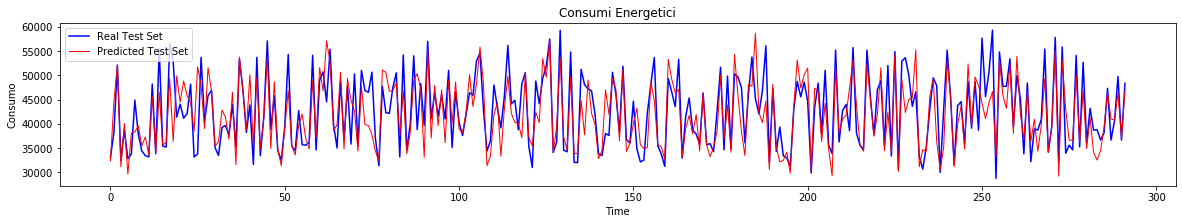

R2 = 0.63
RMSE = 0.63
MAE = 0.47


In [31]:
##Random Forest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 2, random_state = 42)
reg.fit(X_train, y_train.ravel())
R2,RMSE,MAE = metrics(X_test,y_test,reg)

plot_result(X_train,X_test,y_train,y_test,reg,scaler_y,True)
print_result(R2,RMSE,MAE,reg)

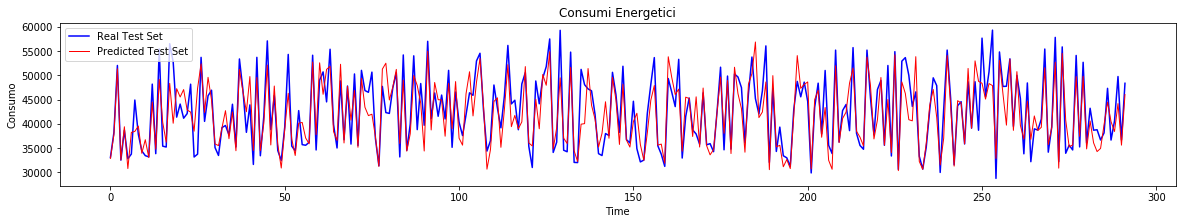

R2 = 0.74
RMSE = 0.53
MAE = 0.40


In [32]:
##Random Forest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
reg.fit(X_train, y_train.ravel())
R2,RMSE,MAE = metrics(X_test,y_test,reg)

plot_result(X_train,X_test,y_train,y_test,reg,scaler_y,True)
print_result(R2,RMSE,MAE,reg)

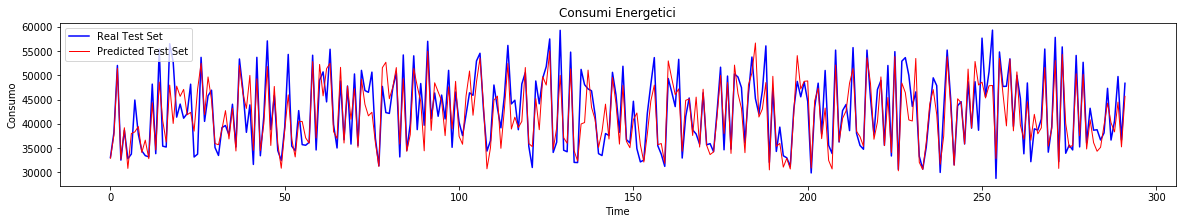

R2 = 0.74
RMSE = 0.53
MAE = 0.40


In [33]:
##Random Forest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 1000, random_state = 42)
reg.fit(X_train, y_train.ravel())
R2,RMSE,MAE = metrics(X_test,y_test,reg)

plot_result(X_train,X_test,y_train,y_test,reg,scaler_y,True)
print_result(R2,RMSE,MAE,reg)

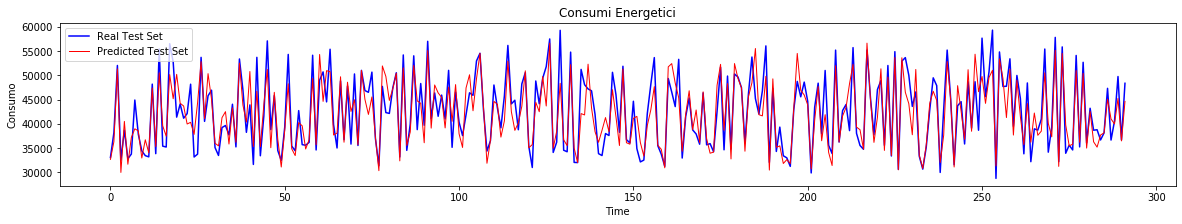

R2 = 0.78
RMSE = 0.49
MAE = 0.37


In [34]:
import xgboost as xgb
reg = xgb.XGBRegressor(n_estimators=100,reg_lambda=2,gamma=0.1,max_depth=3)
reg.fit(X_train, y_train)
R2,RMSE,MAE = metrics(X_test,y_test,reg)

plot_result(X_train,X_test,y_train,y_test,reg,scaler_y,True)
print_result(R2,RMSE,MAE,reg)

In [35]:
pd.DataFrame(reg.feature_importances_.reshape(1, -1), columns=["Prezzo","Gradi","BankH","EndYear","DayOff","G1","G2","G3","G4","G5","G6","G7"])

,Prezzo,Gradi,BankH,EndYear,DayOff,G1,G2,G3,G4,G5,G6,G7
0,0.018744,0.51241,0.08438,0.003522,0.013174,0.125533,0.008095,0.14861,0.035226,0.006302,0.018098,0.025908
